# Overview

The dataset contains user and expert reviews, genres, platforms (for example, Xbox or PlayStation), and historical data on video game sales.

## Objective

To identify patterns that determine whether a game is successful or not. This will allow us to detect promising projects and plan advertising campaigns.

### Data Description

— *name*: Name of the video game

—*Platform*: Platform

—*Year_of_Release*: Game release year

—*Genre*: Genre of the game

—*NA_sales*: North American sales in millions of US dollars

—*EU_sales*: sales in Europe in millions of US dollars

—*JP_sales*: sales in Japan in millions of US dollars

— *Other_sales*: sales in other countries in millions of US dollars

—*Critic_Score*: score from 1 to 100

— *User_Score*: score from 1 to 10

—*Rating*:ESRB Rating

Data for 2016 may be incomplete.

## 1. Start

In this section, we will review each of the columns in the dataframe to identify if there are corrections to make.

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import levene, ttest_ind
import matplotlib.pyplot as plt

#import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('.\dataset\games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Showing dataset
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


After having a general view of the dataframe, you can see that there are some corrections that must be applied to the columns and their data, these would be the following:

- Standardize column names to lowercase.
- Correct the data type of the necessary columns.
- Address cases of missing values.

## 2. Pre-Processing of Data
In this section, we will first rename the columns by converting them all to lowercase. Then, we will review each of them individually and apply the corrections mentioned in the previous point if necessary.

In [6]:
# Turn all columns lowercase
df = df.rename(str.lower, axis='columns')
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.1 Columns

#### 2.1.1 name

In [7]:
df.dtypes['name']

dtype('O')

In [8]:
100*(df['name'].isna().sum())/df.shape[0]

0.011965300628178284

In [9]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Applying corrections**

It was found that this column has 2 null values, since these represent 0.01% of the total rows, we will proceed to eliminate them. Likewise, we will convert all values to lowercase to avoid having duplicates due to syntax.

In [10]:
# Dropping missing values
df = df.dropna( subset=['name']).reset_index(drop=True)
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [11]:
# Turn all values to lowercase
df['name'] = df['name'].str.lower()
df['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

#### 2.1.2 platform

In [12]:

df.dtypes['platform']

dtype('O')

In [13]:
100*(df['platform'].isna().sum())/df.shape[0]

0.0

In [14]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Nothing to correct.

#### 2.1.3 year_of_release


In [15]:
df.dtypes['year_of_release']

dtype('float64')

In [16]:
100*(df['year_of_release'].isna().sum())/df.shape[0]

1.6095255190570215

In [17]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,freaky flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


It is observed that 1.6% of the year_of_release records are absent, given that the data was obtained from different databases, it is very likely that some of them will have incomplete information. Because games are generally released on multiplatform, the years of other platforms will be taken to fill in the missing years of the same game; However, before doing so, we will normalize the game names by removing the white spaces before and after the text.

In [18]:
df.groupby('name')['year_of_release'].median()

name
 beyblade burst                                  2016.0
 fire emblem fates                               2015.0
 frozen: olaf's quest                            2013.0
 haikyu!! cross team match!                      2016.0
 tales of xillia 2                               2012.0
                                                  ...  
zumba fitness rush                               2012.0
zumba fitness: world party                       2013.0
zwei!!                                           2008.0
zyuden sentai kyoryuger: game de gaburincho!!    2013.0
¡shin chan flipa en colores!                     2007.0
Name: year_of_release, Length: 11559, dtype: float64

In [19]:
# removing whitespace at the start and end of each gamename string.
df['name'] = df['name'].str.strip()


In [20]:
# Group by name and show the median for each year.
df_name_grouped = df.groupby('name')['year_of_release'].max()

In [21]:
# Filling null values

def fill_year(df):
    if pd.isna(df['year_of_release']) == True:
        return df_name_grouped[df['name']]
    else:
        return df['year_of_release']
    
df['year_of_release'] = df.apply(fill_year, axis=1)

In [22]:

100*(df['year_of_release'].isna().sum())/df.shape[0]

0.8735714713097589

It can be seen that not all the missing values could be treated but at least half of them could be reduced. For now, we will leave the column this way, in order not to alter the data.

#### 2.1.4 genre


In [23]:
df.dtypes['genre']

dtype('O')

In [24]:

100*(df['genre'].isna().sum())/df.shape[0]

0.0

Nothin to correct

#### 2.1.5 na_sales


In [25]:
df.dtypes['na_sales']

dtype('float64')

In [26]:

100*(df['na_sales'].isna().sum())/df.shape[0]

0.0

Nothing to correct

#### 2.1.6 eu_sales


In [27]:

df.dtypes['eu_sales']

dtype('float64')

In [28]:

#df['genre'].isna().sum()
100*(df['eu_sales'].isna().sum())/df.shape[0]

0.0

Nothing to correct

#### 2.1.7 jp_sales


In [29]:
df.dtypes['jp_sales']

dtype('float64')

In [30]:

#df['genre'].isna().sum()
100*(df['jp_sales'].isna().sum())/df.shape[0]

0.0

Nothing to correct

#### 2.1.8 other_sales


In [31]:
df.dtypes['other_sales']

dtype('float64')

In [32]:

#df['genre'].isna().sum()
100*(df['other_sales'].isna().sum())/df.shape[0]

0.0

Nothing to correct

#### 2.1.9 critic_score


In [33]:

df.dtypes['critic_score']

dtype('float64')

In [34]:

df['critic_score'].isna().sum()
100*(df['critic_score'].isna().sum())/df.shape[0]

51.313348890085564

It is observed that 51% of the values are null, this represents more than half of all the data and these are independent values, that is, since it is a subjective assessment, they are not related to other columns so impute them It would be complicated. So, for now we will leave these values as they are and we will see how the data behaves in the subsequent analysis.

#### 2.1.10 user_score


In [35]:
df.dtypes['user_score']

dtype('O')

In [36]:

df['user_score'].isna().sum()
100*(df['user_score'].isna().sum())/df.shape[0]

40.082570454137496

In [37]:
df['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

**Applying corrections**

It shows that the data type is `String` when it should be numeric and `float`. This is because there is a value with the acronym tbd which means 'to be determined' that affects the data type. Likewise, this column contains missing values that represent 40% of the total.

To correct this, we will first convert the `tbd` values to null and then change the data type to `float`.

We will not impute null values because the same thing happens as in the previous column `critic_score`, they are not related to any other column, so filling in these values would alter the data.

In [38]:
# Replace 'tbd' values to null
df['user_score'] = df['user_score'].replace('tbd', np.nan)
# Validate the conversion
df['user_score'].value_counts(dropna=False)

NaN    9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [39]:
# Change data type
df['user_score'] = df['user_score'].astype('float', errors='ignore')
df.dtypes['user_score']

dtype('float64')

#### 2.1.11 rating


In [40]:
df.dtypes['rating']

dtype('O')

In [41]:

df['rating'].isna().sum()
100*(df['rating'].isna().sum())/df.shape[0]

40.4714892598576

In [42]:
df['rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

The data type of this column is correct; However, it is observed that it has 40% of its data as null. In the same way as in the `critic_score` and `user_score` columns we will not impute and leave the data as is.

### 2.2 Removal of duplicates
Next, validate and eliminate if there are duplicate rows.

In [43]:
df[df.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No duplicated values.

### 2.3 Data enrichment
In this section, we will add a new column to enrich the data. We will calculate the total sales of each video game in all regions.

In [44]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


## 3. Data Analysis

### 3.1 Number of games released per year
Next, we will show graphically how the creation of video games behaved over the years.

<Axes: title={'center': 'Number of games released per year'}, xlabel='year of release', ylabel='number of games'>

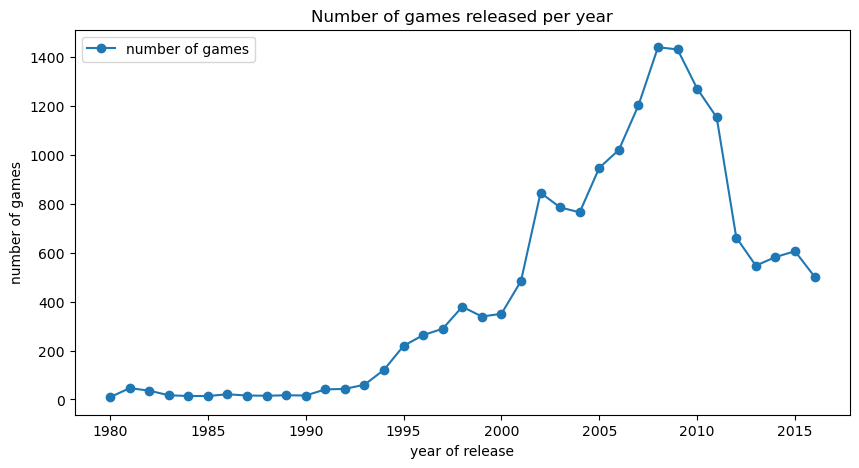

In [45]:
# Show how many games were released per year
(df
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(style='o-',
       y='name',
       figsize=(10,5),
       ylabel='number of games',
       xlabel='year of release',
       title='Number of games released per year',
       label='number of games')
)


#print(df['year_of_release'].sort_values(ascending = False).plot(kind='bar'))

In this graph it can be seen that, approximately, starting in 1994 there was a growth in the launch of video games, with the highest peak between 2008 and 2009. From these years onwards, the trend of video game launches began to decrease until The last year recorded in our data is 2015.

### 3.2 Platforms with the highest total sales
It will be shown how sales vary from one platform to another and we will see the top 10 that had the highest sales over the years.

<Axes: title={'center': 'Top 10 - total sales platforms'}, xlabel='platform', ylabel='total sales (Mill-USD)'>

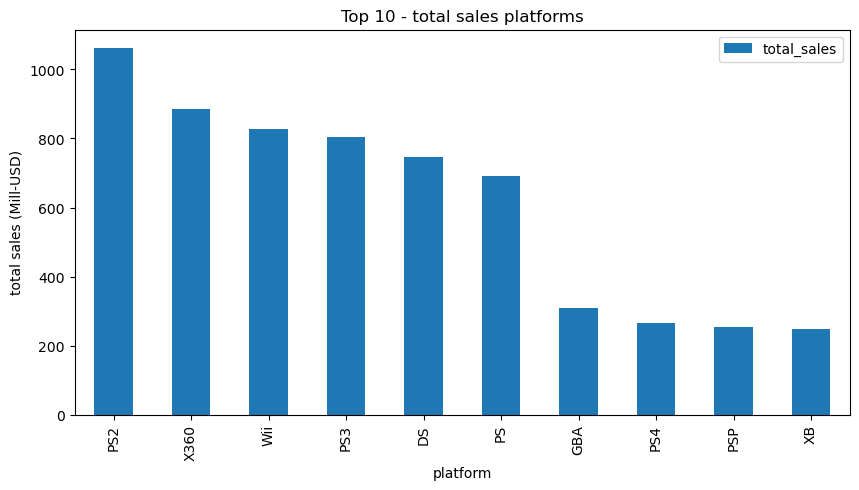

In [69]:
# Show the 10 platforms with the most sales
(df
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by = 'total_sales',ascending = False)
 .head(10)
 .plot(
     kind='bar',
     figsize=(10,5),
     ylabel='total sales (Mill-USD)',
     title='Top 10 - total sales platforms'
     )
)

In this graph you can see the 10 platforms that had the highest total sales, with the PS2 being the leader and the only platform that generated more than 1000 million dollars, followed by X360 and Wii with almost 850 and 810 million dollars respectively.

### 3.3 Evolution of the 5 platforms with the most sales annually


In [47]:
# Create a list of the 5 most popular platforms
most_popular_platforms = list(
    df
    .groupby('platform')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by = 'total_sales',ascending = False)
    .head(5)['platform']
    )

<Axes: title={'center': 'Top 5 total sales platforms'}, xlabel='year of release', ylabel='Total sales'>

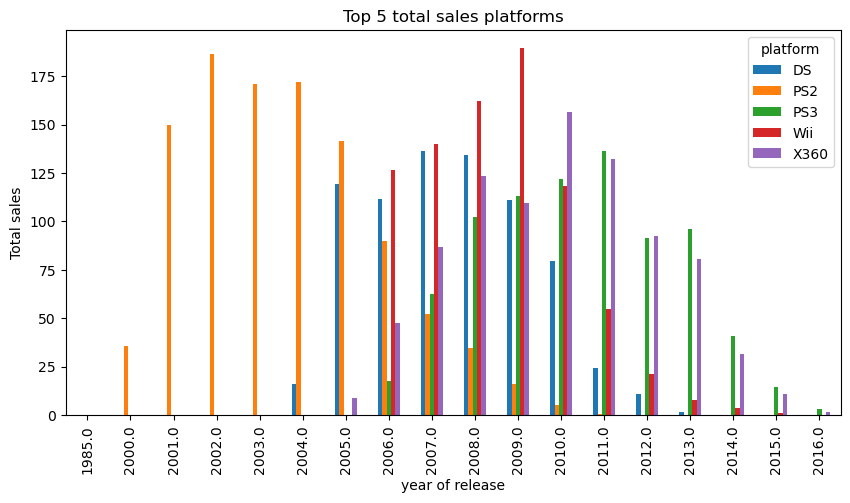

In [48]:
# Show the annual sales evolution of the 5 platforms with the highest sales
df_top_platforms = df[df['platform'].isin(most_popular_platforms)]

(df_top_platforms
 .pivot_table(index='year_of_release', columns='platform' , values='total_sales', aggfunc='sum')
 .plot(kind = 'bar',
        #y='total_sales',
        figsize=(10,5),
        ylabel='Total sales',
        xlabel='year of release',
        title='Top 5 total sales platforms',
        label='Total sales'
        )
      
)

In this graph you can see the income generated by the top 5 platforms with the most sales over the years.

Platforms shown are: DS, PS2, PS3, Wii and X360.
It can be seen that the PS2 is the one that has been on the market the longest compared to the other 4 platforms, remaining in force until 2011 when it could be said that it disappeared from the map. On the other hand, the Wii platform had higher sales between 2006 and 2009, declining significantly the following year until almost disappearing in 2015. At present, the platforms with the highest total sales are PS3 and X360.

### 3.4 Evolution of all platforms annually
We will show a timeline that plots the total sales of all platforms in order to determine which platforms used to be popular and that currently have decreased sales as well as the life cycle of the platforms.

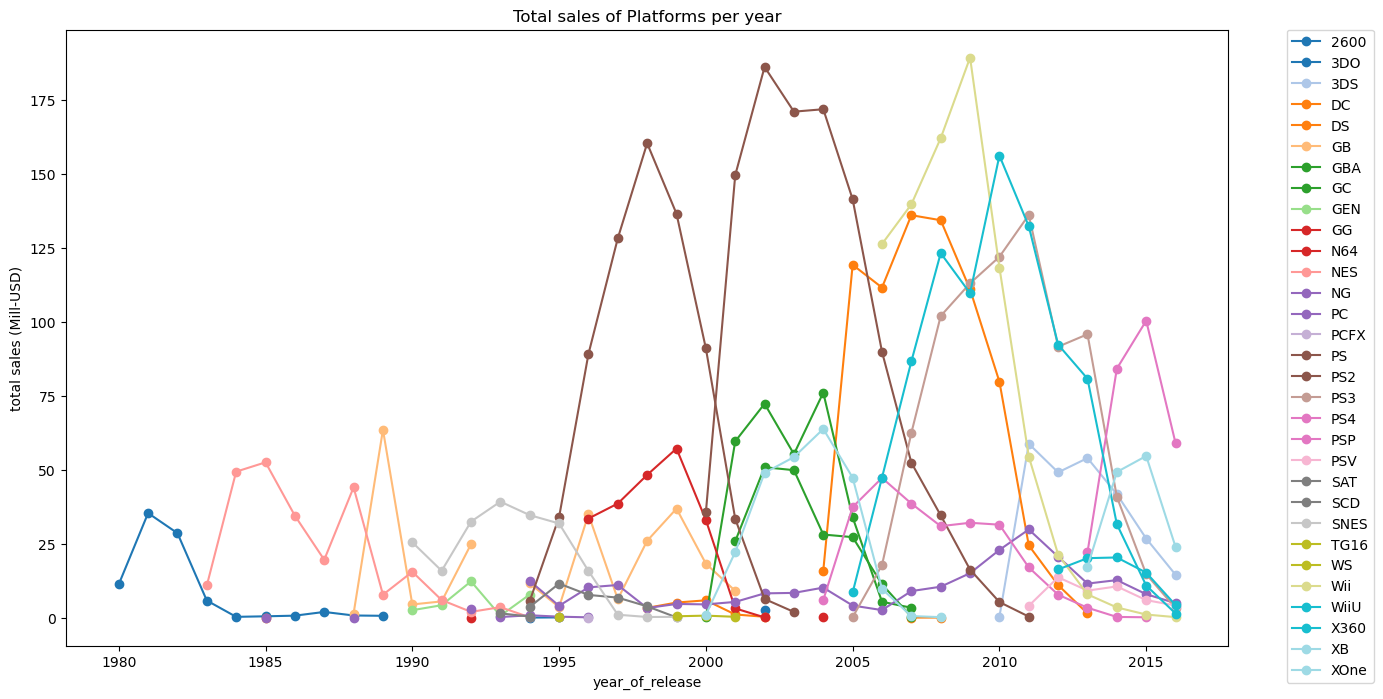

In [49]:
# Show platform sales timeline by year.

(df
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(
        #kind='bar',
        style='o-',
        figsize=(15,8),
        ylabel='total sales (Mill-USD)',
        title='Total sales of Platforms per year',
        colormap='tab20',
        legend=True
        )
)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

**Popularity of platforms**

This graph shows that the PS, PS2 and Wii platforms that were very popular at the time, approximately, after approximately 5 years since their launch, had a decline in sales that continues to the present. Such is the case of Wii, which had the highest sales peak in 2009, generating income very close to 200 million dollars and in 2015 less than 5 million. This pattern is replicated on other platforms, so it can be concluded that, apparently, the popularity of the platforms lasts around 5 years.

**Platform life cycle**

Regarding the life cycle of the platforms, it can be seen that they remain in force for around 10 years, after which, they begin to disappear and generate minimal income. This could be observed with the 2600, NES, SNES platforms and starting in 1990, between 2 to 3 new platforms began to be launched every 2.5 years.

### 3.5 Potentially profitable platforms

To know the most profitable platforms, we are going to segment the data. To do this, we rely on the previous graph where it can be seen that since 1994 we have more information on platforms. Therefore, with this new filtered dataframe, we created a new timeline to have a clearer picture of those leading selling platforms.

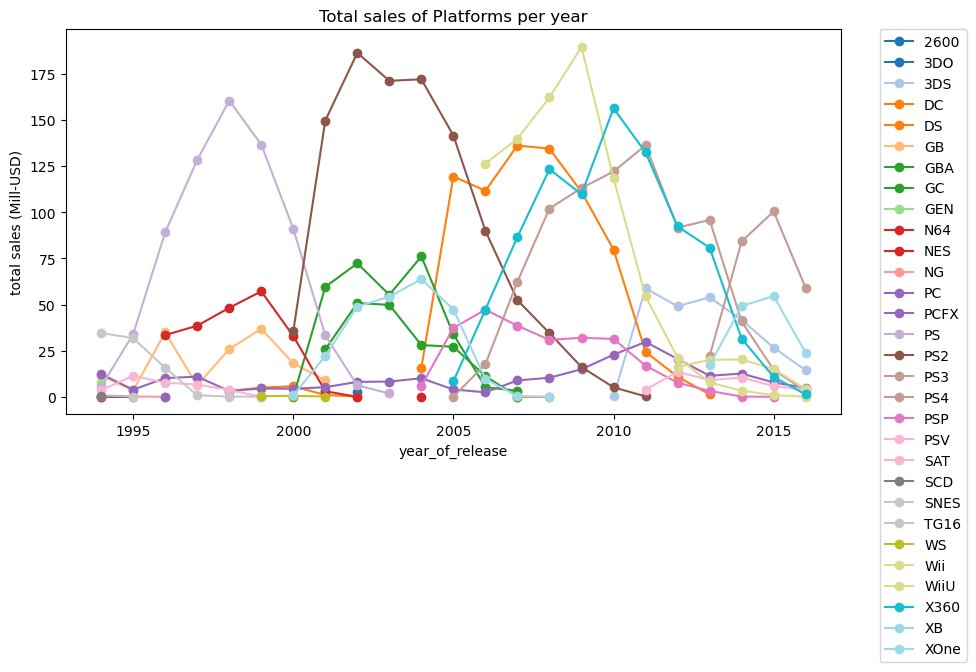

In [50]:
# Show platform sales timeline by year from 1994 onwards.
df_new = df.query('year_of_release >= 1994')
(df_new
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(
        style='o-',
        figsize=(10,5),
        ylabel='total sales (Mill-USD)',
        title='Total sales of Platforms per year',
        colormap='tab20',
        legend=True
        )
)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)



From the graph, you can see that, in recent years, the leading sales platforms have been losing popularity; However, there are still 3 relatively new platforms that in the last 3 years maintained sales higher than the rest: PS4, XOne, 3DS.

Depending on the behavior of the life cycle of the platforms, there could still be projections in the sale of video games for these 3 platforms during the next 2 years or until a new platform is born.

In addition, there is a fourth platform that has remained in force for 30 years until the present, it is the PC, which is not the most popular in video game sales but its level of sales has been almost constant unlike the rest that had increases. and significant drops.

### 3.6 Average game sales by platforms

<Axes: title={'center': 'total_sales'}, xlabel='[platform]'>

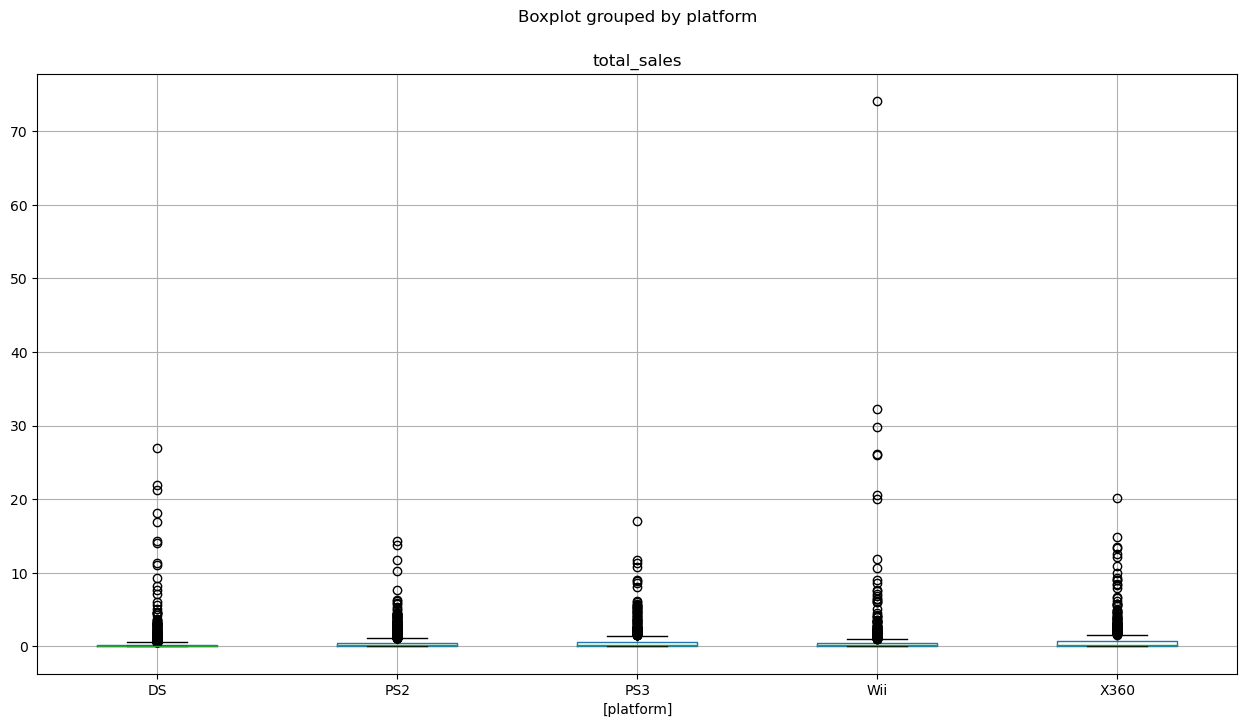

In [51]:
# Show box plot for the 5 most popular platforms in sales in the last 22 years.
(df_new
 .query('platform in @most_popular_platforms')[['platform','total_sales']]
 .boxplot(by='platform', figsize=(15, 8))
)

This graph shows the distribution of data from the 5 most popular platforms in the last 22 years, where it can be seen that there is not much variation in the medians and percentile limits, however, it can be seen that the Wii platform presents greater outliers than the rest. This may be possible, due to the sales peaks that this platform had during 2009, which did not last long.

### 3.7 Correlation of user and professional scores regarding game sales
In this section, we will identify how much the user and professional score impacts sales.

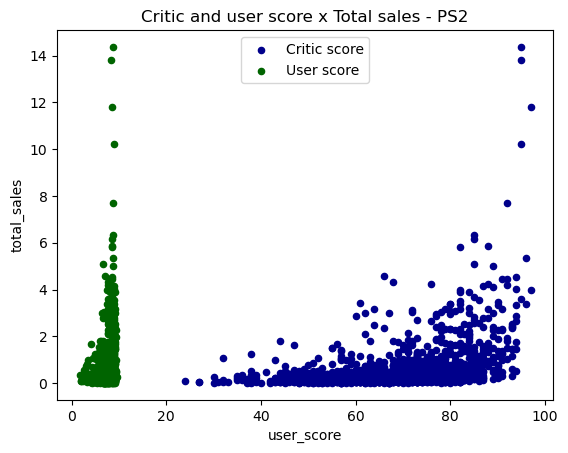

              total_sales  critic_score  user_score
total_sales      1.000000      0.408145    0.186308
critic_score     0.408145      1.000000    0.562473
user_score       0.186308      0.562473    1.000000


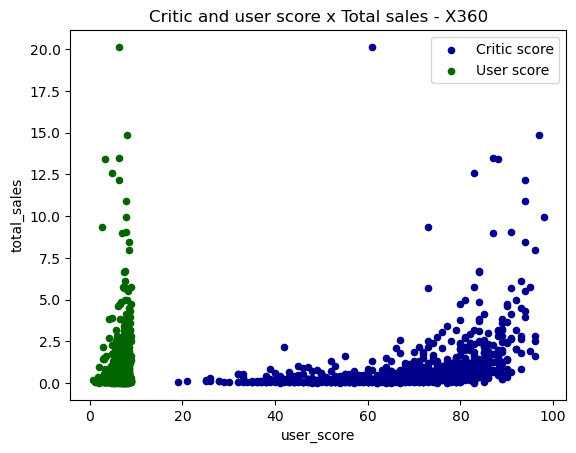

              total_sales  critic_score  user_score
total_sales      1.000000      0.390602    0.112748
critic_score     0.390602      1.000000    0.623261
user_score       0.112748      0.623261    1.000000


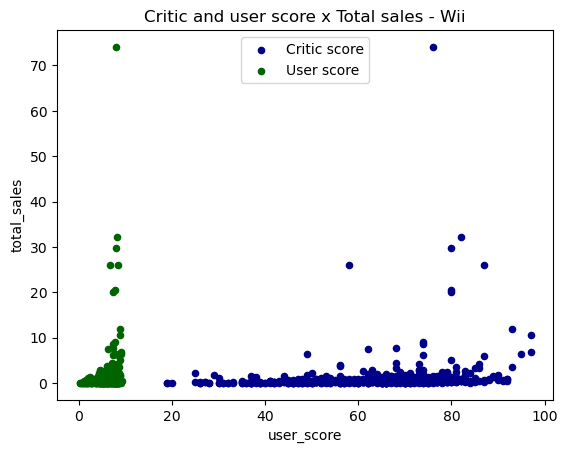

              total_sales  critic_score  user_score
total_sales      1.000000      0.179469    0.114378
critic_score     0.179469      1.000000    0.682232
user_score       0.114378      0.682232    1.000000


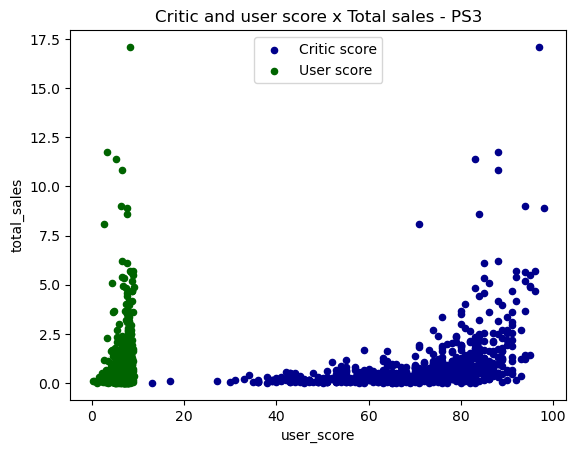

              total_sales  critic_score  user_score
total_sales      1.000000      0.437121    0.130311
critic_score     0.437121      1.000000    0.628833
user_score       0.130311      0.628833    1.000000


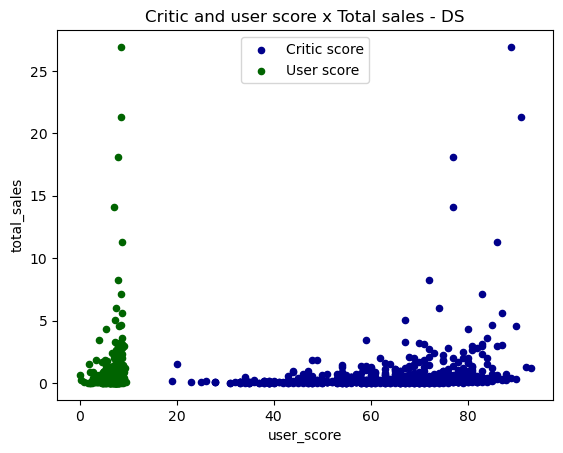

              total_sales  critic_score  user_score
total_sales      1.000000      0.238935    0.132625
critic_score     0.238935      1.000000    0.654032
user_score       0.132625      0.654032    1.000000


In [52]:
# Scatter plot for critic and user scores for the 5 most popular platforms

for plat in most_popular_platforms:
    
    ax = df_new.query('platform == @plat').plot(
        kind="scatter", 
        x="critic_score", 
        y="total_sales",
        color='DarkBlue', 
        label='Critic score'
        )
    
    (df
    .query('platform == @plat')
    .plot(
        kind='scatter',
        x="user_score", 
        y="total_sales",
        color='DarkGreen', 
        label='User score',
        title= f'Critic and user score x Total sales - {plat}',
        ax = ax
        )
    )
    plt.show()
    correlation = df_new.query('platform == @plat')[["total_sales", "critic_score","user_score"]].corr()
    print(correlation)

After examining the graphs on the 5 most popular platforms and seeing the behavior of the ratings from critics and users, it is concluded that the impact of these scores on video game sales is not very great. In the case of PS2 and PS3, sales have a direct and slightly stronger relationship than the other 3 platforms; However, in none of the 5 platforms is there a dependency on both variables.

### 3.9 Sale of the best-selling games by platform


In [53]:
# Create a list of cross-platform games
cross_platform_games = list(df_new.groupby("name")["platform"].nunique().reset_index().query("platform > 1")["name"])

<Axes: title={'center': 'Total sales of games by platforms'}, xlabel='Games', ylabel='Total sales'>

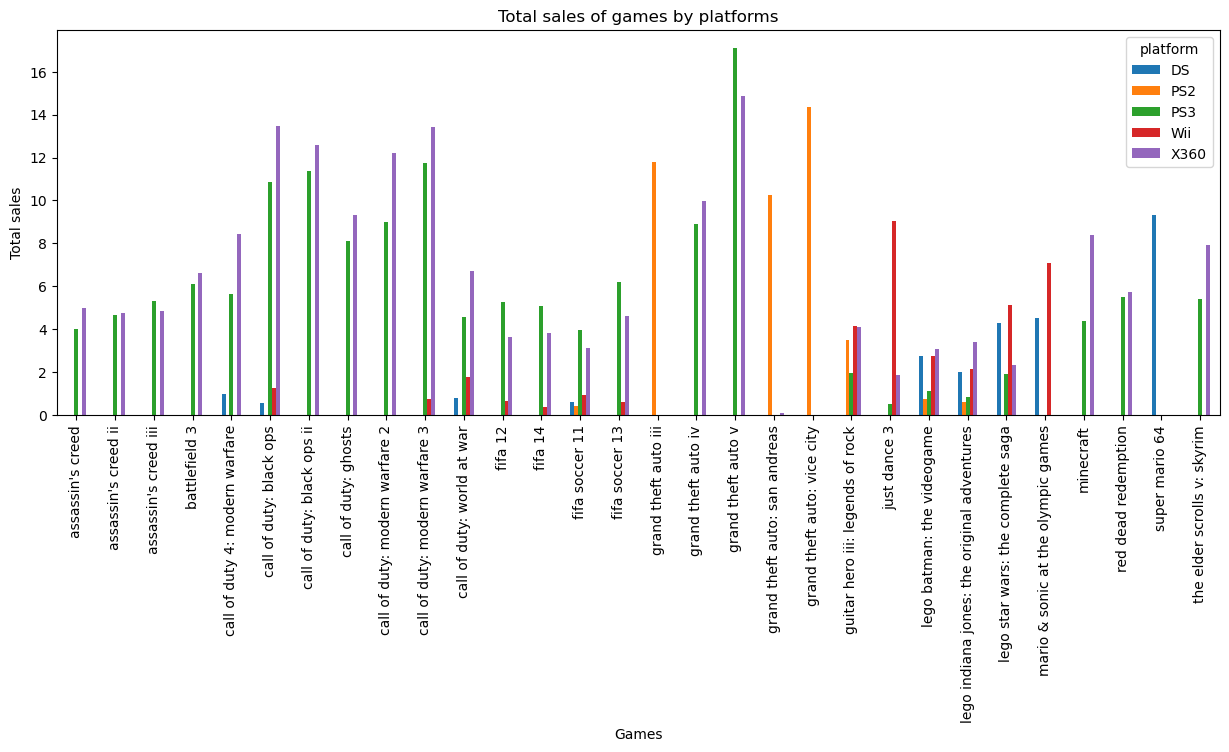

In [54]:
# See the sales of the 30 best-selling games by platform

df_top_games = list((df_top_platforms
 .query("name in @cross_platform_games")
 .groupby("name")["total_sales"].sum()
 .sort_values(ascending=False)
 .head(30)
 .reset_index()['name']
 ))

(df_top_platforms
 .query("name in @df_top_games")
 .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind = 'bar',
        #y='name',
        figsize=(15,5),
        ylabel='Total sales',
        xlabel='Games',
        title='Total sales of games by platforms',
        label='Total sales'
        )
)

In this graph you can see the 30 most popular cross-platform games in sales and how their behavior was on each platform.
In the case of the sequels such as Assassin's Creed, Call of Duty, FIFA and Grand Theft Auto, they were very popular in sales on PS3 and X360, with the exception of Grand Theft Auto: San Andreas which was much more popular on PS2 than the X360.

In general, it is seen that the X360 and PS3 platforms were more popular in sales of cross-platform games.

### 3.10 Sales by gender
In this section, we will see the behavior of sales with respect to the game genre.

<Axes: title={'center': 'Top 10 - total sales x genre'}, xlabel='genre', ylabel='total sales (Mill-USD)'>

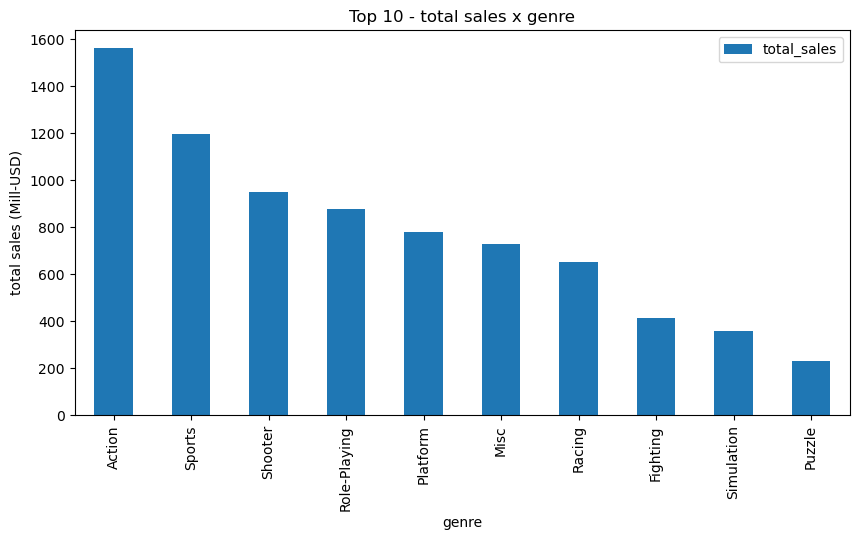

In [55]:
# Show the 10 platforms with the most sales
(df
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by = 'total_sales',ascending = False)
 .head(10)
 .plot(
     kind='bar',
     figsize=(10,5),
     ylabel='total sales (Mill-USD)',
     title='Top 10 - total sales x genre'
     )
)

It can be seen that the action genre is the most popular among games, followed by sports and shooting games. Among the least sold are the puzzle and simulation ones.

## 4. Analysis of user profiles in each region

### 4.1 Variations in market shares from one region to another in the 5 most popular platforms
We will identify how sales were on the most popular platforms in the 3 regions: North America, the United States and Japan.

In [56]:
# Create a list with regions
regions = ["na_sales", "eu_sales", "jp_sales"]

In [57]:
# # Create a function to show the most popular sales by category in each region

def get_market_share (data, regions, category):

    for region in regions:
        sales_by_platform = (
            data
            .groupby(category)[region]
            .sum()
            .reset_index()
        )

        sales_by_popular_platform = (
            sales_by_platform
            .sort_values(by=region, ascending=False)
            .head(5)
        )
        #print(sales_by_popular_platform)

        plt.figure(figsize=(10, 4))
        sales_by_popular_platform.plot(kind="bar", x=category, y=region, ax=plt.gca())
        plt.show()


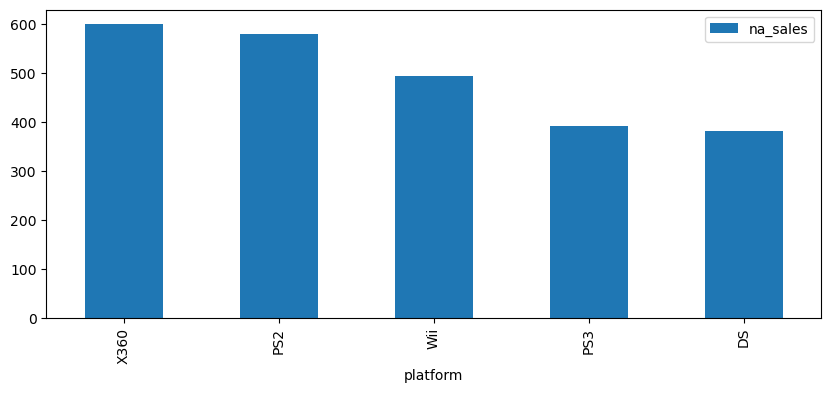

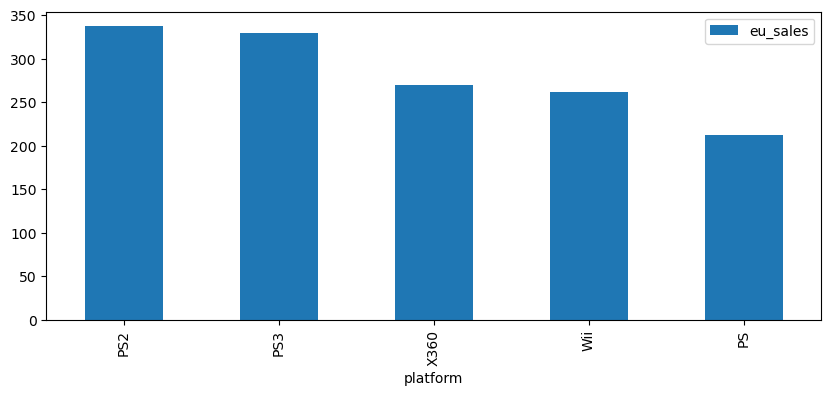

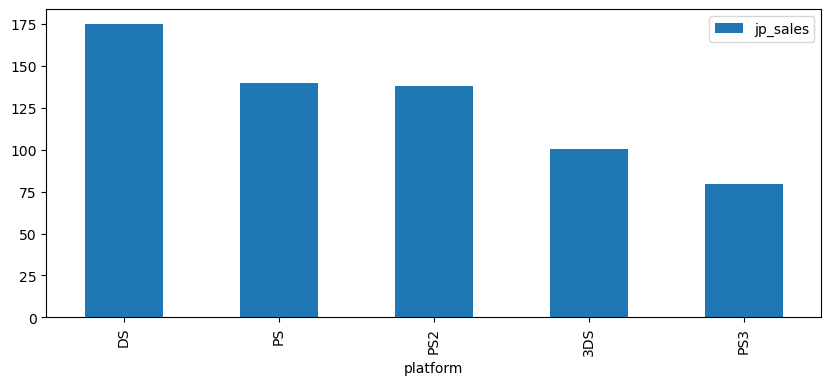

None


In [58]:
# Show the most popular sales by platform in each region
print(get_market_share (df_new, regions, 'platform'))

It is observed that:
- In North America, X360 games were the most popular, followed by PS2 games.
- In the case of the United States, the platform with the most games sold was the PS2 and PS3.
- In Japan, popularity went to the Nintendo DS, followed by the Play Station and Play Station 2, respectively.

In all 3 regions, the Play Station 2 remains the most popular platform.

### 4.2  The top five genres in each region

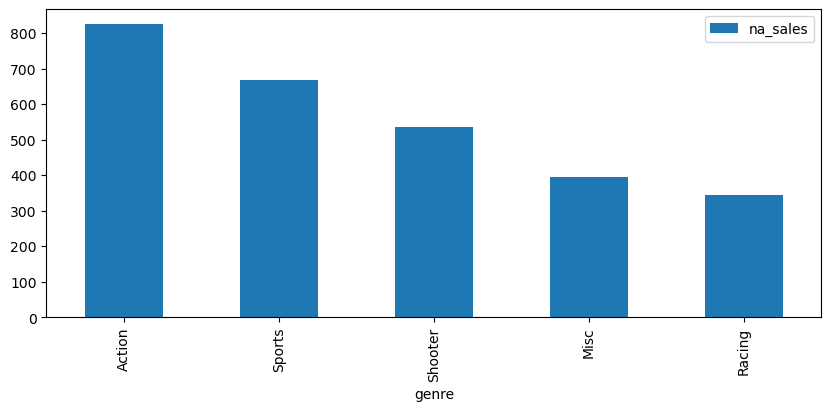

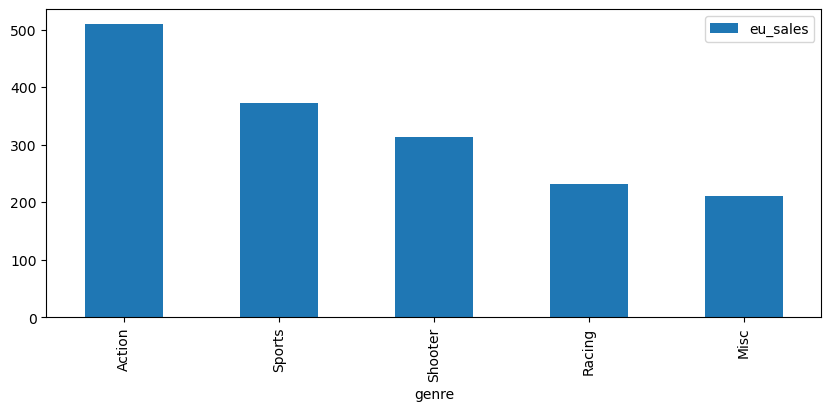

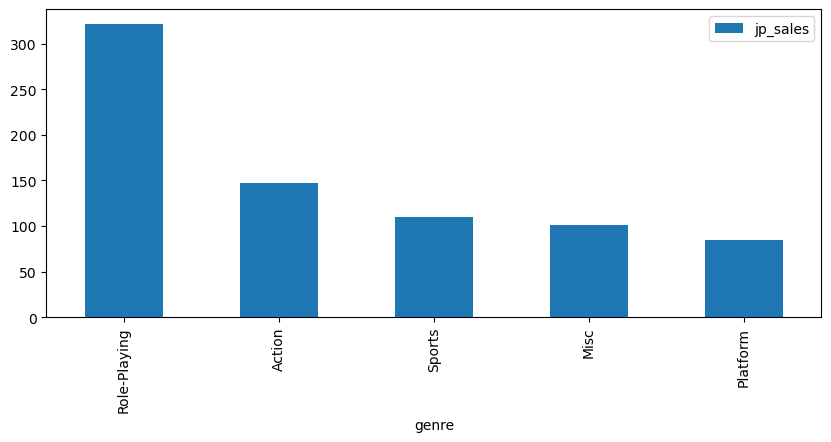

None


In [59]:
# Show the most popular sales by genre in each region
print(get_market_share (df_new, regions, 'genre'))

It is observed that:
- In North America the best-selling game genre was action, followed by sports and the 5th most popular was racing.
- In the case of the United States, the result was similar to that of North America except for the 5th most popular, which was miscellaneous.
- In the case of Japan, the role-playing game genre was much better selling than action and sports.

In general, the most popular genres in the 3 regions were action, sports, and in the case of Japan, role playing.

### 4.3 ESRB ratings and sales by region.

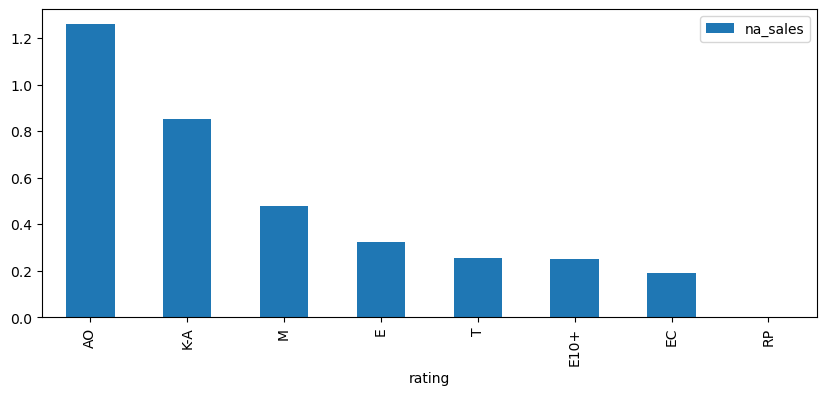

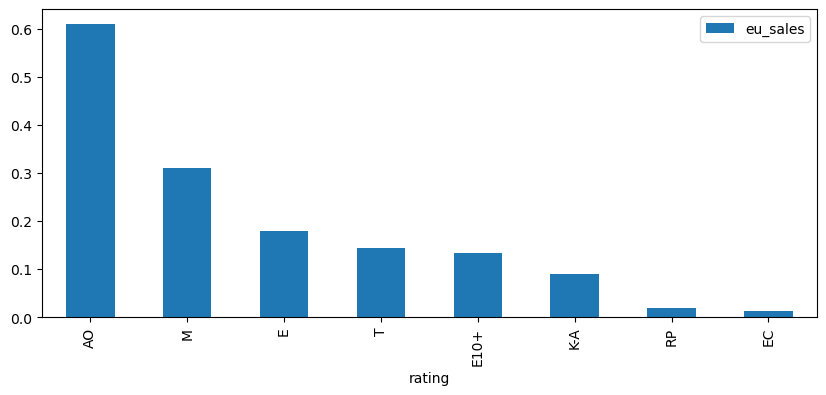

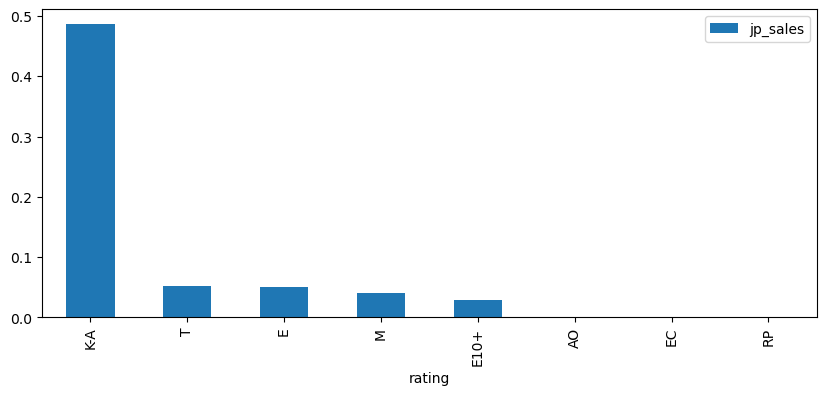

In [60]:
#Show the most popular sales by classification in each region

for region in regions:
  sales_by_rating = (
      df_new
      .groupby("rating")[region]
      .mean()
      .reset_index()
      .sort_values(by=region, ascending=False)
      .reset_index(drop=True)
  )

  plt.figure(figsize=(10, 4))
  sales_by_rating.plot(kind="bar", x="rating", y=region, ax=plt.gca())
  plt.show()

From the graphs shown, you can see that AO (Adults only 18+) rated games are the most popular in North America and the United States, this makes sense with the previous graphs where they showed that the best selling genre was action that generally presents this classification. However, in the case of Japan, the K-A (Kids to Adults) game classification is seen to be the most popular.

## 5. Hypothesis evaluation
In this section we formulate the hypotheses to determine the following:

H1: There is a variation between the average user ratings for the Xbox One and PC platforms.

H2: There is a variation between the average user ratings for the Action and Sports genres.

### 5.1 There is a variation between the average user ratings for the Xbox One and PC platforms.

Ho = Average user ratings for Xbox One and PC platforms are the same.

Ha = The average user ratings for Xbox One and PC platforms are not the same.

In [61]:
df_with_user_score = df_new[df_new['user_score'].notnull()]

In [62]:
# variance test

# Let's define a threshold of 0.05
alpha = 0.05

t_stat_var, p_value_var = levene(
    df_with_user_score.query("platform == 'XOne'")["user_score"],
    df_with_user_score.query("platform == 'PC'")["user_score"]
)

print(f"""
(variance test) p-value: {p_value_var}
""")

if p_value_var < alpha:
  print("Rechazamos hipótesis nula: tenemos evidencia de que las varianzas no son iguales.")
else:
  print("No rechazamos hipótesis nula: no tenemos evidencia de que las varianzas son diferentes.")


t_stat, p_value = ttest_ind(
    df_with_user_score.query("platform == 'XOne'")["user_score"],
    df_with_user_score.query("platform == 'PC'")["user_score"],
    alternative = "two-sided",
    equal_var=True
)

print(f"""
p-value: {p_value}
""")

if p_value < alpha:
  print("Rechazamos hipótesis nula. \n Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.")
else:
  print("No rechazamos hipótesis nula. \n Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")


(variance test) p-value: 0.31028627329145647

No rechazamos hipótesis nula: no tenemos evidencia de que las varianzas son diferentes.

p-value: 8.266884212241274e-06

Rechazamos hipótesis nula. 
 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.


### 5.2 There is a variation between the average user ratings for the Action and Sports genres.

Ho = The average user ratings for the Action and Sports genres are the same.

Ha = The average user ratings for Action and Sports genres are not the same.

In [63]:
# variance test

# Let's define a threshold of 0.05
alpha = 0.05

t_stat_var, p_value_var = levene(
    df_with_user_score.query("genre == 'Action'")["user_score"],
    df_with_user_score.query("genre == 'Sports'")["user_score"]
)

print(f"""
(variance test) p-value: {p_value_var}
""")

if p_value_var < alpha:
  print("Rechazamos hipótesis nula: tenemos evidencia de que las varianzas no son iguales.")
else:
  print("No rechazamos hipótesis nula: no tenemos evidencia de que las varianzas son diferentes.")


t_stat, p_value = ttest_ind(
    df_with_user_score.query("genre == 'Action'")["user_score"],
    df_with_user_score.query("genre == 'Sports'")["user_score"],
    alternative = "two-sided",
    equal_var=False
)

print(f"""
p-value: {p_value}
""")

if p_value < alpha:
  print("Rechazamos hipótesis nula. \n Las calificaciones promedio de los usuarios para los generos de Accion y Deportes no son las mismas.")
else:
  print("No rechazamos hipótesis nula. \n Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son las mismas.")


(variance test) p-value: 0.00012737877390417462

Rechazamos hipótesis nula: tenemos evidencia de que las varianzas no son iguales.

p-value: 0.08991887133875968

No rechazamos hipótesis nula. 
 Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son las mismas.


In [68]:
# We export the datasets

df.to_csv("results_df\\" + 'df_cleaned.csv')
df_top_platforms.to_csv("results_df\\" + 'df_top_platforms.csv')
df_new.to_csv("results_df\\" + 'df_new.csv')
#df_top_games.to_csv("results_df\\" + 'df_top_games.csv') es una lista
df_with_user_score.to_csv("results_df\\" + 'df_with_user_score.csv')

## 6. Conclusions

1. At the initialization of the project, we had to understand the information that each column offered us and how these were related to the project objective of identifying whether a game is successful or not based on sales by platform, genre and region.
2. During data processing, it was identified that the dataframe had incomplete information, this was probably because the data was extracted from various sources before having all the information complete, since 'tbd' data was presented that was pending qualification. Based on all this, we had to work with null values since the columns were not related to each other in order to complete this data.
3. Next, we study the statistical distribution of the games and platforms, obtaining some answers such as:
- From 1994 onwards there was a growth in the launch of new games until 2015 where it was its highest peak.
- The 3 platforms with the highest sales were the Play Station 2, X360 and the Nintendo Wii.
- The Nintendo Wii was the most popular platform and the one that generated the highest sales in 2009. After that, the most popular platforms were the X360 and the Wii.
- Some additional data regarding the platforms is that the popularity of each of them lasts approximately 5 years and their validity lasts 10 years before they begin to disappear from the market. In addition, approximately every 2 and a half years, between 2 to 3 new platforms are launched on the market.
- Currently, in 2016, the Play station 4, XOne and 3DS are the platforms that have the greatest projection and will maintain their popularity for at least 2 more years.
- On the other hand, the ratings of users and critics of the games do not have much impact on sales.
- The behavior of Japanese users with North American users differs somewhat in terms of genres, ratings and platforms.
4. Finally, 2 two-tailed hypotheses were formulated comparing the means of 2 populations where we accepted the following theses:
- Average user ratings for Xbox One and PC platforms are not the same.
- Average user ratings for Action and Sports genres are the same.
5. In general, it is concluded that a game will have higher sales depending on the platform and region in which it is launched because the end user differs depending on their context.